In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
NPRingSystemPropertiesDF = pd.read_csv('../../../20210901_analysis/NP_all_descriptors.csv', sep=';')
ZINCRingSystemPropertiesDF = pd.read_csv('../../../20210901_analysis/ZINC_all_descriptors.csv', sep=';')
drugRingSystemPropertiesDF = pd.read_csv('/data/local/ringsys/20211202_analysis/drugs_all_descriptors.csv',sep=';')
dataframe = pd.concat([NPRingSystemPropertiesDF, ZINCRingSystemPropertiesDF,drugRingSystemPropertiesDF], ignore_index=True)

In [4]:
NPRingSystemPropertiesDF

,ringSmiles_noStereo,ring_conID,db,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,bridgeheadAtoms,frac_csp3
0,c1ccccc1,4,NP,0,0,0,78.114,6,0,0,1.687,0.00,6,0,1,0,0.000
1,C1CCOCC1,22,NP,0,1,0,86.134,6,1,0,1.187,9.23,0,0,1,0,1.000
2,O=c1ccoc2ccccc12,44,NP,0,2,0,146.145,11,2,0,1.793,30.21,10,0,2,0,0.000
3,C1CCOC1,18,NP,0,1,0,72.107,5,1,0,0.797,9.23,0,0,1,0,1.000
4,C1CCCCC1,54,NP,0,0,0,84.162,6,0,0,2.341,0.00,0,0,1,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30998,O=C1C=CC=CC2C(C=CC=CC=CCCNC(=O)C1)C=CC1C(=O)CC...,9131,NP,1,3,4,391.511,29,3,1,4.034,63.24,0,0,3,0,0.400
30999,O=C1C2C=CC3C=CCCCCCCC=CC=CC=CC3C2C2CCCN12,9130,NP,1,1,5,363.545,27,1,0,5.605,20.31,0,0,4,0,0.560
31000,O=C1C=CC2CC(=O)CC2CC1,9128,NP,0,2,2,164.204,12,2,0,1.501,34.14,0,0,2,0,0.600
31001,C1=CC2CCCCC3OC23CC1,9127,NP,0,1,3,164.248,12,1,0,2.664,12.53,0,0,3,0,0.818


In [5]:
NPRingSystemPropertiesDF.describe()

,ring_conID,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,bridgeheadAtoms,frac_csp3
count,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000,31003.000000
mean,15502.461020,0.866110,2.429797,3.750669,302.139103,22.147566,3.023675,0.483889,3.263599,42.235552,4.423540,0.020869,4.654259,1.590556,0.572398
std,8950.369926,1.754653,2.175068,3.718572,181.541423,13.224067,2.459586,1.218298,3.063345,41.289255,6.755849,0.165534,3.210027,3.005449,0.269178
min,1.000000,0.000000,0.000000,0.000000,40.065000,3.000000,0.000000,0.000000,-19.618000,0.000000,0.000000,-2.000000,1.000000,0.000000,0.000000
25%,7751.500000,0.000000,1.000000,1.000000,194.274000,14.000000,2.000000,0.000000,1.692000,18.460000,0.000000,0.000000,3.000000,0.000000,0.385000
50%,15502.000000,0.000000,2.000000,3.000000,252.401000,19.000000,3.000000,0.000000,2.811000,34.140000,0.000000,0.000000,4.000000,0.000000,0.614000
75%,23253.500000,1.000000,3.000000,5.000000,331.503000,24.000000,4.000000,1.000000,4.192000,52.600000,6.000000,0.000000,5.000000,2.000000,0.786000
max,31004.000000,30.000000,30.000000,32.000000,2142.336000,144.000000,36.000000,26.000000,23.472000,837.840000,72.000000,6.000000,30.000000,27.000000,1.000000


In [6]:
ZINCRingSystemPropertiesDF.describe()

,ring_conID,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,bridgeheadAtoms,frac_csp3
count,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000,30265.000000
mean,15133.000000,1.743631,1.211267,0.943334,193.325162,13.931835,2.618437,0.829572,1.567389,38.569976,6.029176,0.067173,2.980340,0.415166,0.394731
std,8736.897285,1.549900,1.265156,1.798406,76.630809,5.776090,1.603670,0.951246,1.762938,25.534072,6.058408,0.283969,1.529939,1.254893,0.333241
min,1.000000,0.000000,0.000000,0.000000,37.858000,3.000000,0.000000,0.000000,-9.655000,0.000000,0.000000,-2.000000,1.000000,0.000000,0.000000
25%,7567.000000,0.000000,0.000000,0.000000,141.174000,10.000000,2.000000,0.000000,0.380000,21.260000,0.000000,0.000000,2.000000,0.000000,0.083000
50%,15133.000000,2.000000,1.000000,0.000000,180.247000,13.000000,2.000000,1.000000,1.458000,35.530000,6.000000,0.000000,3.000000,0.000000,0.333000
75%,22699.000000,3.000000,2.000000,1.000000,227.252000,17.000000,3.000000,1.000000,2.616000,52.580000,10.000000,0.000000,4.000000,0.000000,0.667000
max,30265.000000,24.000000,15.000000,27.000000,996.840000,74.000000,20.000000,8.000000,20.685000,282.600000,74.000000,4.000000,37.000000,16.000000,1.000000


In [7]:
drugRingSystemPropertiesDF.describe()

,ring_conID,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,bridgeheadAtoms,frac_csp3
count,596.000000,596.000000,596.00000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,298.500000,1.494966,1.27349,1.000000,179.192015,12.953020,2.209732,0.870805,1.366810,36.739664,4.889262,0.050336,2.473154,0.377517,0.407220
std,172.194657,1.597785,1.82992,1.974629,113.562294,8.103395,1.958727,1.357860,2.068475,39.524613,4.973660,0.226370,1.840976,1.314469,0.357997
min,1.000000,0.000000,0.00000,0.000000,42.081000,3.000000,0.000000,0.000000,-9.722000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,149.750000,0.000000,0.00000,0.000000,112.856000,8.000000,1.000000,0.000000,0.186000,15.600000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,298.500000,1.000000,1.00000,0.000000,146.149000,11.000000,2.000000,1.000000,1.297000,29.100000,5.000000,0.000000,2.000000,0.000000,0.343000
75%,447.250000,2.000000,2.00000,1.000000,212.220250,16.000000,3.000000,1.000000,2.578750,46.150000,9.000000,0.000000,3.000000,0.000000,0.714000
max,596.000000,12.000000,16.00000,16.000000,1011.248000,64.000000,18.000000,11.000000,10.840000,340.410000,30.000000,2.000000,30.000000,16.000000,1.000000


In [8]:
len(ZINCRingSystemPropertiesDF[ZINCRingSystemPropertiesDF['frac_csp3']==0])/len(ZINCRingSystemPropertiesDF)

0.2281513299190484

In [9]:
len(NPRingSystemPropertiesDF[NPRingSystemPropertiesDF['frac_csp3']==0])/len(NPRingSystemPropertiesDF)

0.04483437086733542

In [10]:
len(drugRingSystemPropertiesDF[drugRingSystemPropertiesDF['frac_csp3']==0])/len(drugRingSystemPropertiesDF)

0.28187919463087246

In [11]:
dataframe

,ringSmiles_noStereo,ring_conID,db,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,bridgeheadAtoms,frac_csp3
0,c1ccccc1,4,NP,0,0,0,78.114,6,0,0,1.687,0.00,6,0,1,0,0.000
1,C1CCOCC1,22,NP,0,1,0,86.134,6,1,0,1.187,9.23,0,0,1,0,1.000
2,O=c1ccoc2ccccc12,44,NP,0,2,0,146.145,11,2,0,1.793,30.21,10,0,2,0,0.000
3,C1CCOC1,18,NP,0,1,0,72.107,5,1,0,0.797,9.23,0,0,1,0,1.000
4,C1CCCCC1,54,NP,0,0,0,84.162,6,0,0,2.341,0.00,0,0,1,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61859,O=c1ccc2nc3ccccc3oc-2c1,465,Drugs,1,2,0,197.193,15,3,0,2.293,43.10,14,0,3,0,0.000
61860,O=C1CCOC(=O)CNC(=O)CNC(=O)C2CCCN2C(=O)CN1,466,Drugs,4,6,1,340.336,24,6,3,-2.727,133.91,0,0,2,0,0.643
61861,O=S1(=O)CCCc2ccccc21,469,Drugs,0,2,0,182.244,12,2,0,1.407,34.14,6,0,2,0,0.333
61862,C1=Nc2ccccc2Nc2sccc21,470,Drugs,2,0,0,200.266,14,3,1,3.556,24.39,11,0,3,0,0.000


In [12]:
#calculate pca
featureList = []
for column in dataframe.columns:
    if column != 'ringSmiles_noStereo' and column != 'ring_conID' and column != 'db':
        featureList.append(column)

x = dataframe.loc[:, featureList].values
y = dataframe.loc[:, ['db']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

variance = pca.explained_variance_ratio_
principalDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

pcaDF = pd.concat([principalDF, dataframe[['db']], dataframe[['ringSmiles_noStereo']], dataframe[['ring_conID']]], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=featureList)
print(loadings)

                      PC1       PC2
N                0.100477  0.425937
O                0.253009  0.182067
chiral           0.291787 -0.266836
MW               0.421986 -0.034707
heavy_atoms      0.421388 -0.046948
h_acc            0.284184  0.319982
h_don            0.094234  0.397780
logP             0.243985 -0.371308
TPSA             0.229769  0.433995
numAro           0.169921  0.094092
formalCharge    -0.034853  0.024824
numRings         0.376234 -0.192893
bridgeheadAtoms  0.331613 -0.142622
frac_csp3        0.039264 -0.238669


In [36]:
#plot_pca
def plot_pca_legend(pcaDF,variance):
    plt.rcParams['font.sans-serif'] = "Arial"
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['figure.figsize'] = 5.6, 6
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 ({:.2%})'.format(variance[0]), fontsize=18)
    axes.set_ylabel('PC2 ({:.2%})'.format(variance[1]), fontsize=18)

    databases = ['NP', 'ZINC','Drugs']
    colors = ['#145c37', '#ffa600','red']
    for database, color in zip(databases, colors):
        indicesToKeep = pcaDF['db'] == database
        axes.scatter(pcaDF.loc[indicesToKeep, 'PC1'], pcaDF.loc[indicesToKeep, 'PC2'], c=color, s=1,alpha=0.8)
    axes.legend(['NPs','SCs','Drugs'], fontsize=16)
    plt.tick_params(labelsize=16)
    axes.set_xticks([0,10,20,30])
    axes.set_xlim(left=-5.2, right=30.5)
    axes.set_yticks([-10,0,10,20,30])
    axes.set_ylim(bottom=-12, top=37)
    plt.axis('equal')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.axis('scaled')

    plt.tight_layout()
    if len(set(pcaDF.db))==3:
        plt.savefig('/data/local/ringsys/20211202_analysis/pca_legend.png')
    plt.show()

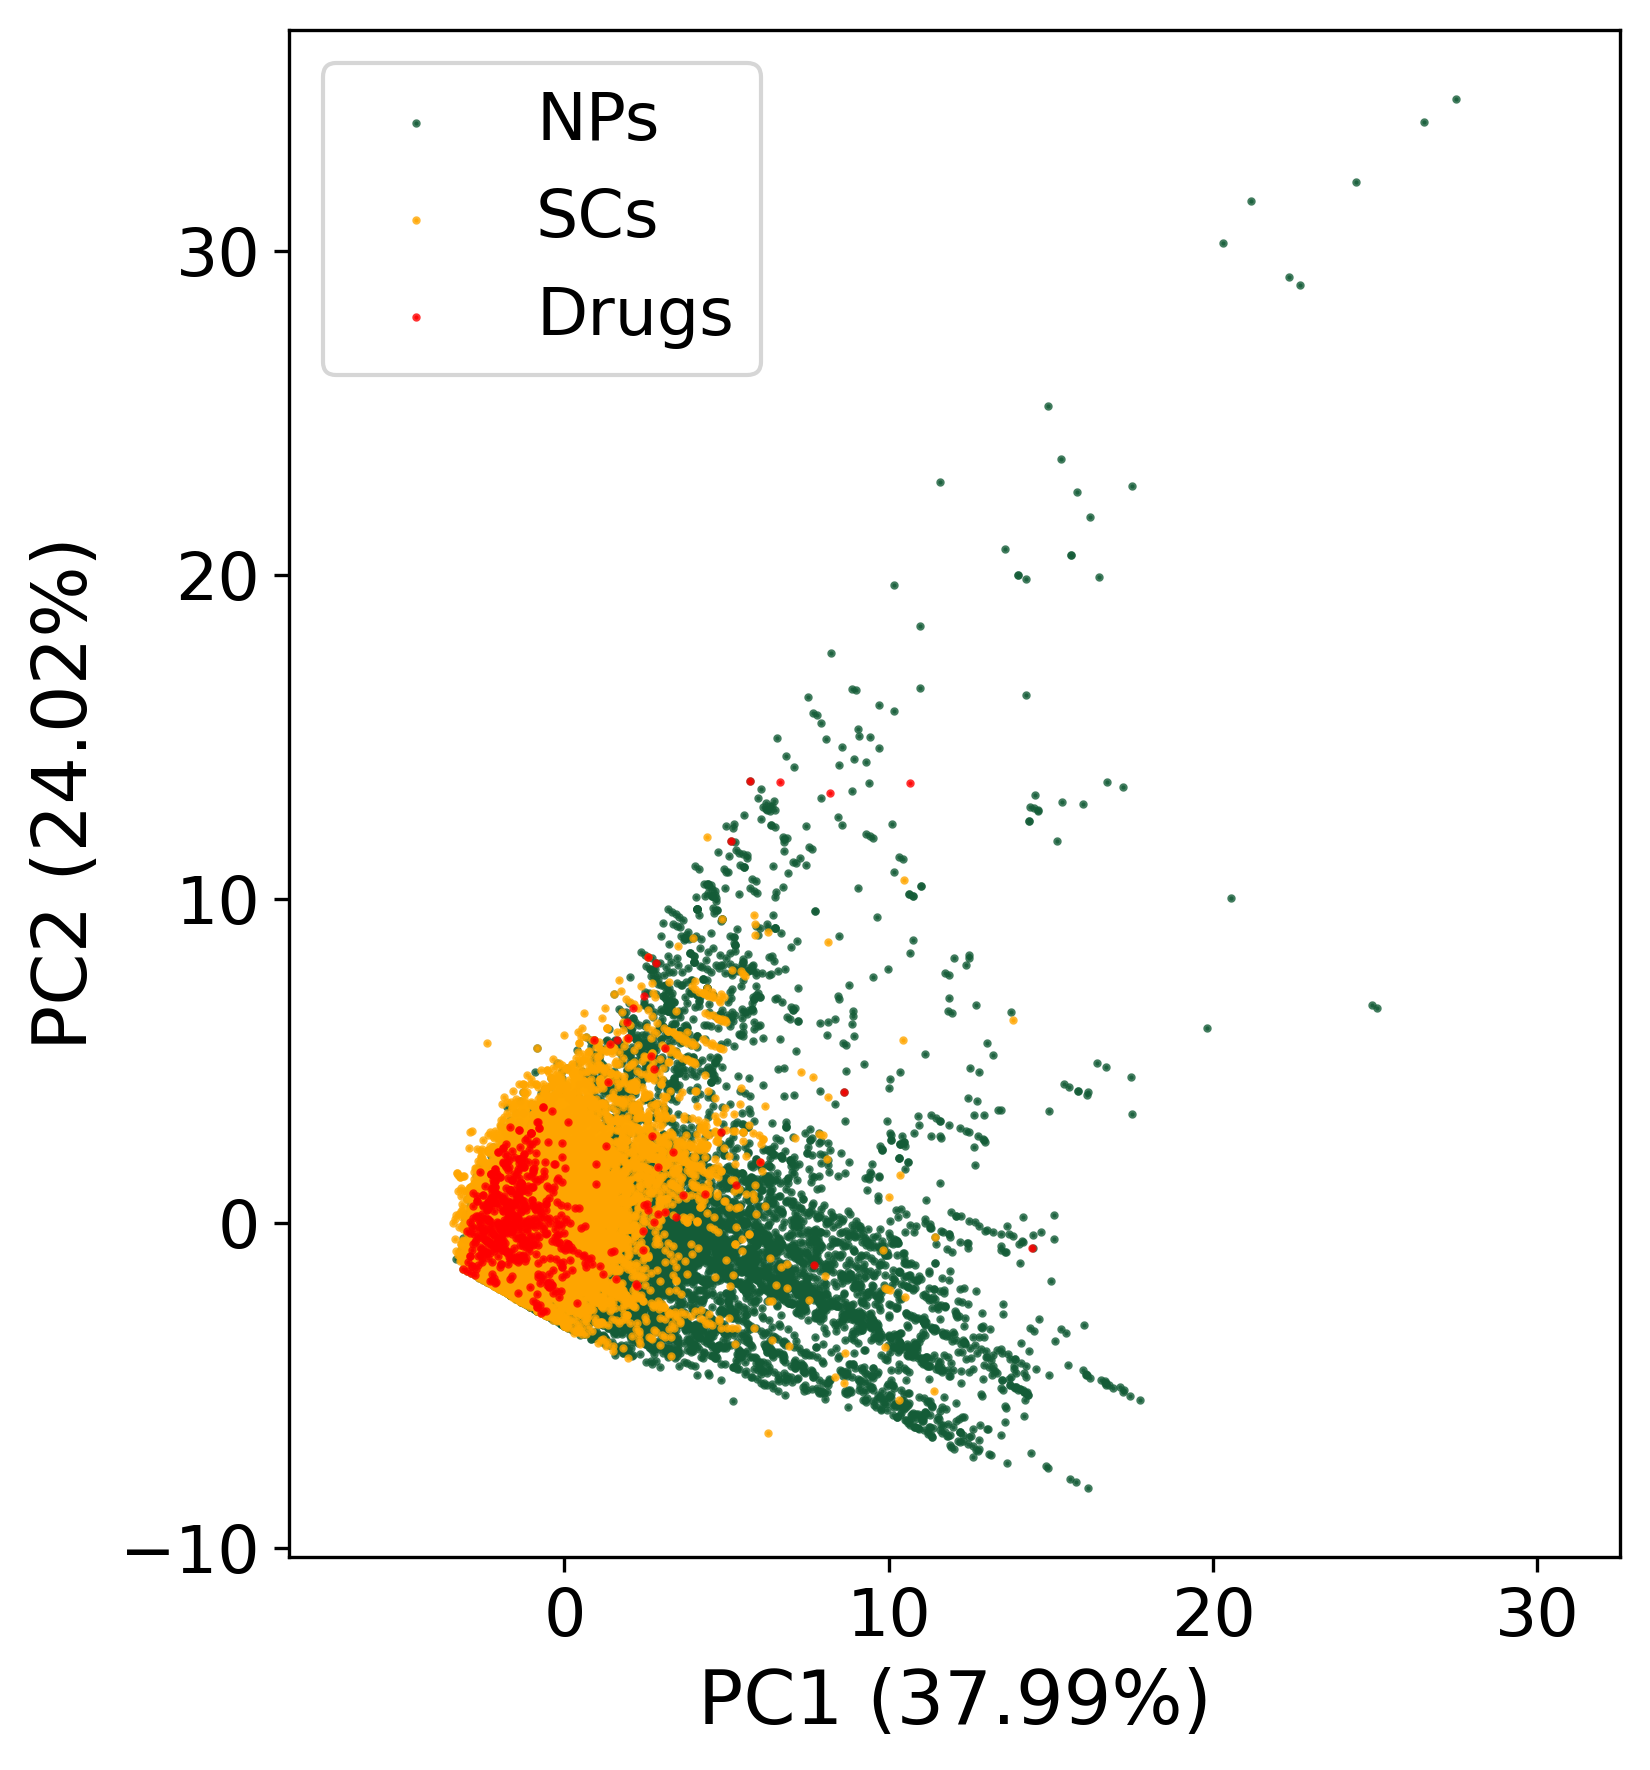

In [37]:
plot_pca_legend(pcaDF,variance)

In [69]:
#plot_pca
def plot_pca(pcaDF,variance):
    plt.rcParams['font.sans-serif'] = "Arial"
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['figure.figsize'] = 5.6,6
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 ({:.2%})'.format(variance[0]), fontsize=18)
    axes.set_ylabel('PC2 ({:.2%})'.format(variance[1]), fontsize=18)

    databases = ['NP', 'ZINC','Drugs']
    colors = ['#145c37', '#ffa600','red']
    for database, color in zip(databases, colors):
        indicesToKeep = pcaDF['db'] == database
        axes.scatter(pcaDF.loc[indicesToKeep, 'PC1'], pcaDF.loc[indicesToKeep, 'PC2'], c=color, s=1,alpha=0.8)
#     axes.legend(['NPs','SCs','Drugs'], fontsize=16)
    plt.tick_params(labelsize=16)
    axes.set_xlim(left=-5.2, right=30.5)
    axes.set_yticks([-10,0,10,20,30])
    axes.set_ylim(bottom=-11.5, top=37)
    plt.axis('equal')
    
    plt.tight_layout()
    if len(set(pcaDF.db))==3:
        plt.savefig('/data/local/ringsys/20211202_analysis/pca.png')
    plt.show()

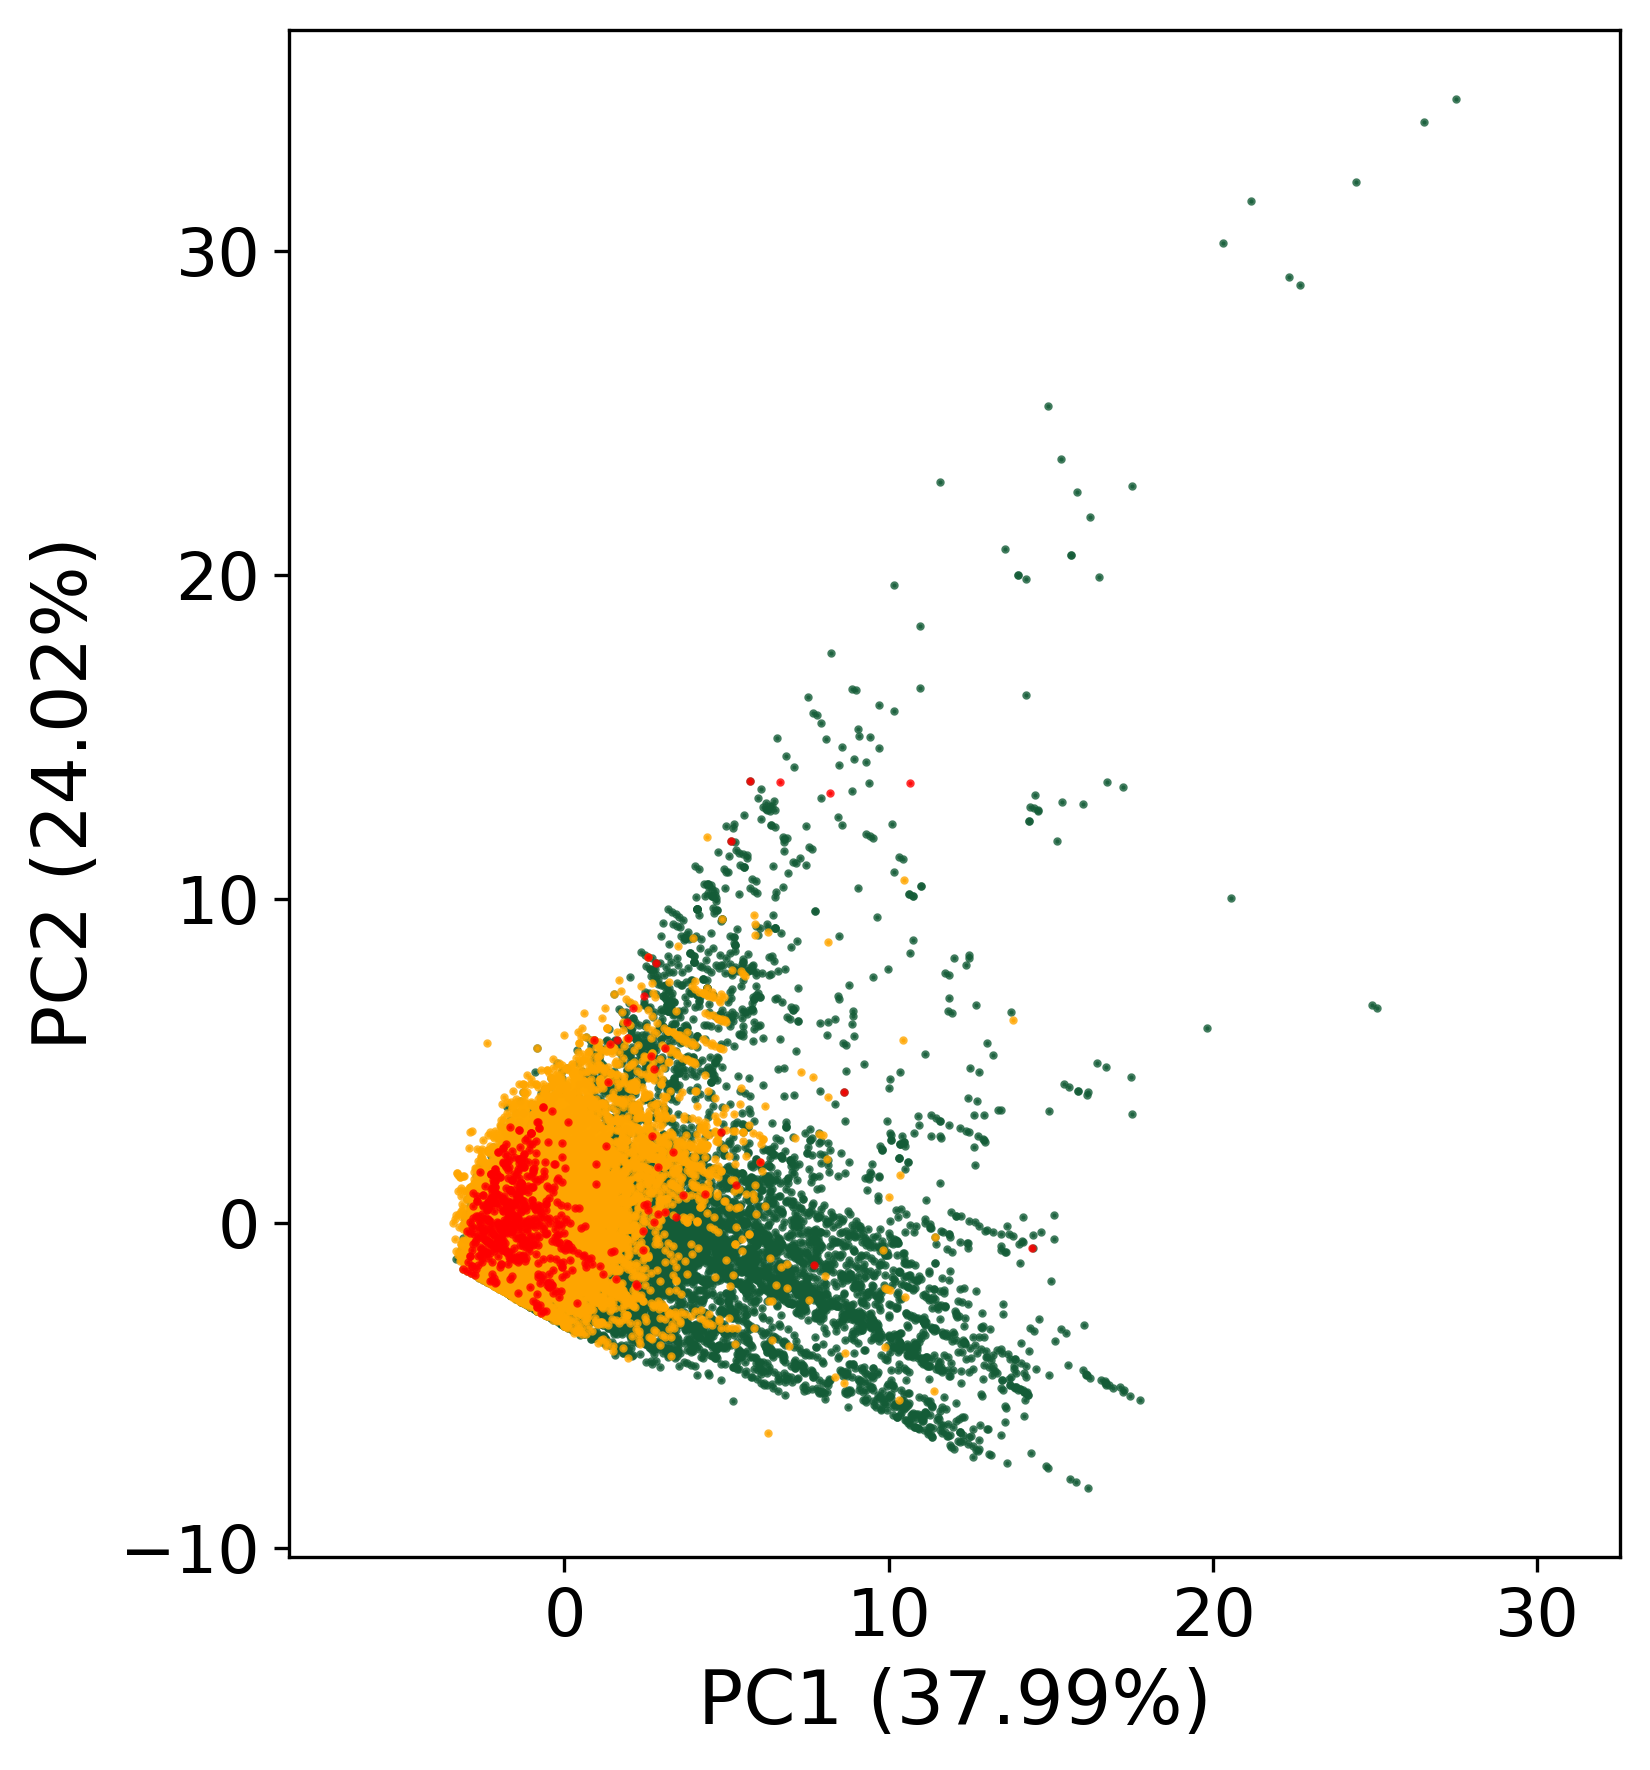

In [70]:
plot_pca(pcaDF,variance)

In [26]:
pcaDF
# pcaDF.to_csv(outputfile, sep='\t', index=False, float_format='%.3f')

,PC1,PC2,db,ringSmiles_noStereo,ring_conID
0,-2.816097,-0.650404,NP,c1ccccc1,4
1,-2.541706,-1.059531,NP,C1CCOCC1,22
2,-1.435608,0.162292,NP,O=c1ccoc2ccccc12,44
3,-2.655396,-0.997244,NP,C1CCOC1,18
4,-2.772260,-1.586808,NP,C1CCCCC1,54
...,...,...,...,...,...
61859,-0.565624,0.612638,Drugs,O=c1ccc2nc3ccccc3oc-2c1,465
61860,1.356962,4.353948,Drugs,O=C1CCOC(=O)CNC(=O)CNC(=O)C2CCCN2C(=O)CN1,466
61861,-1.369127,-0.056627,Drugs,O=S1(=O)CCCc2ccccc21,469
61862,-0.806918,0.573498,Drugs,C1=Nc2ccccc2Nc2sccc21,470


In [28]:
list(loadings.index)

['N',
 'O',
 'chiral',
 'MW',
 'heavy_atoms',
 'h_acc',
 'h_don',
 'logP',
 'TPSA',
 'numAro',
 'formalCharge',
 'numRings',
 'bridgeheadAtoms',
 'frac_csp3']

In [46]:
property_names = ['a_nN','a_nO','chiral','MW','a_heavy','a_acc','a_don','logP','TPSA',
                  'a_aro','FCharge','nRing','a_bridgehead','FCsp3']

In [57]:
# loading plot
from adjustText import adjust_text

def plot_loading(loadings):
    #plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['figure.figsize'] = 5.6, 6
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 loadings', fontsize=18)
    axes.set_ylabel('PC2 loadings', fontsize=18)
    
    x = loadings['PC1']
    y = loadings['PC2']
    axes.scatter(x, y, color= 'black', s=5, alpha=1)
    texts = []
#     for i, txt in enumerate(list(loadings.index)):
    for i, txt in enumerate(property_names):
        texts.append(axes.annotate(txt,(x[i],y[i])))
#         axes.annotate(txt,(x[i],y[i]))
    adjust_text(texts, autoalign='y', only_move={'points':'y', 'text':'xy'},
                force_points=0.1, arrowprops=dict(arrowstyle="->", color='r',lw=0.5))
    
    plt.tick_params(labelsize=16)
    axes.set_xlim(left=-0.1, right=0.5)
    axes.set_ylim(bottom=-0.4, top=0.5)
    axes.set_xticks([-0.1,0,0.1,0.2,0.3,0.4,0.5])
    axes.set_yticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
    
    plt.axis('equal')
    
    plt.tight_layout()
    plt.savefig('/data/local/ringsys/20211202_analysis/pca_loadings.png')
    plt.show()

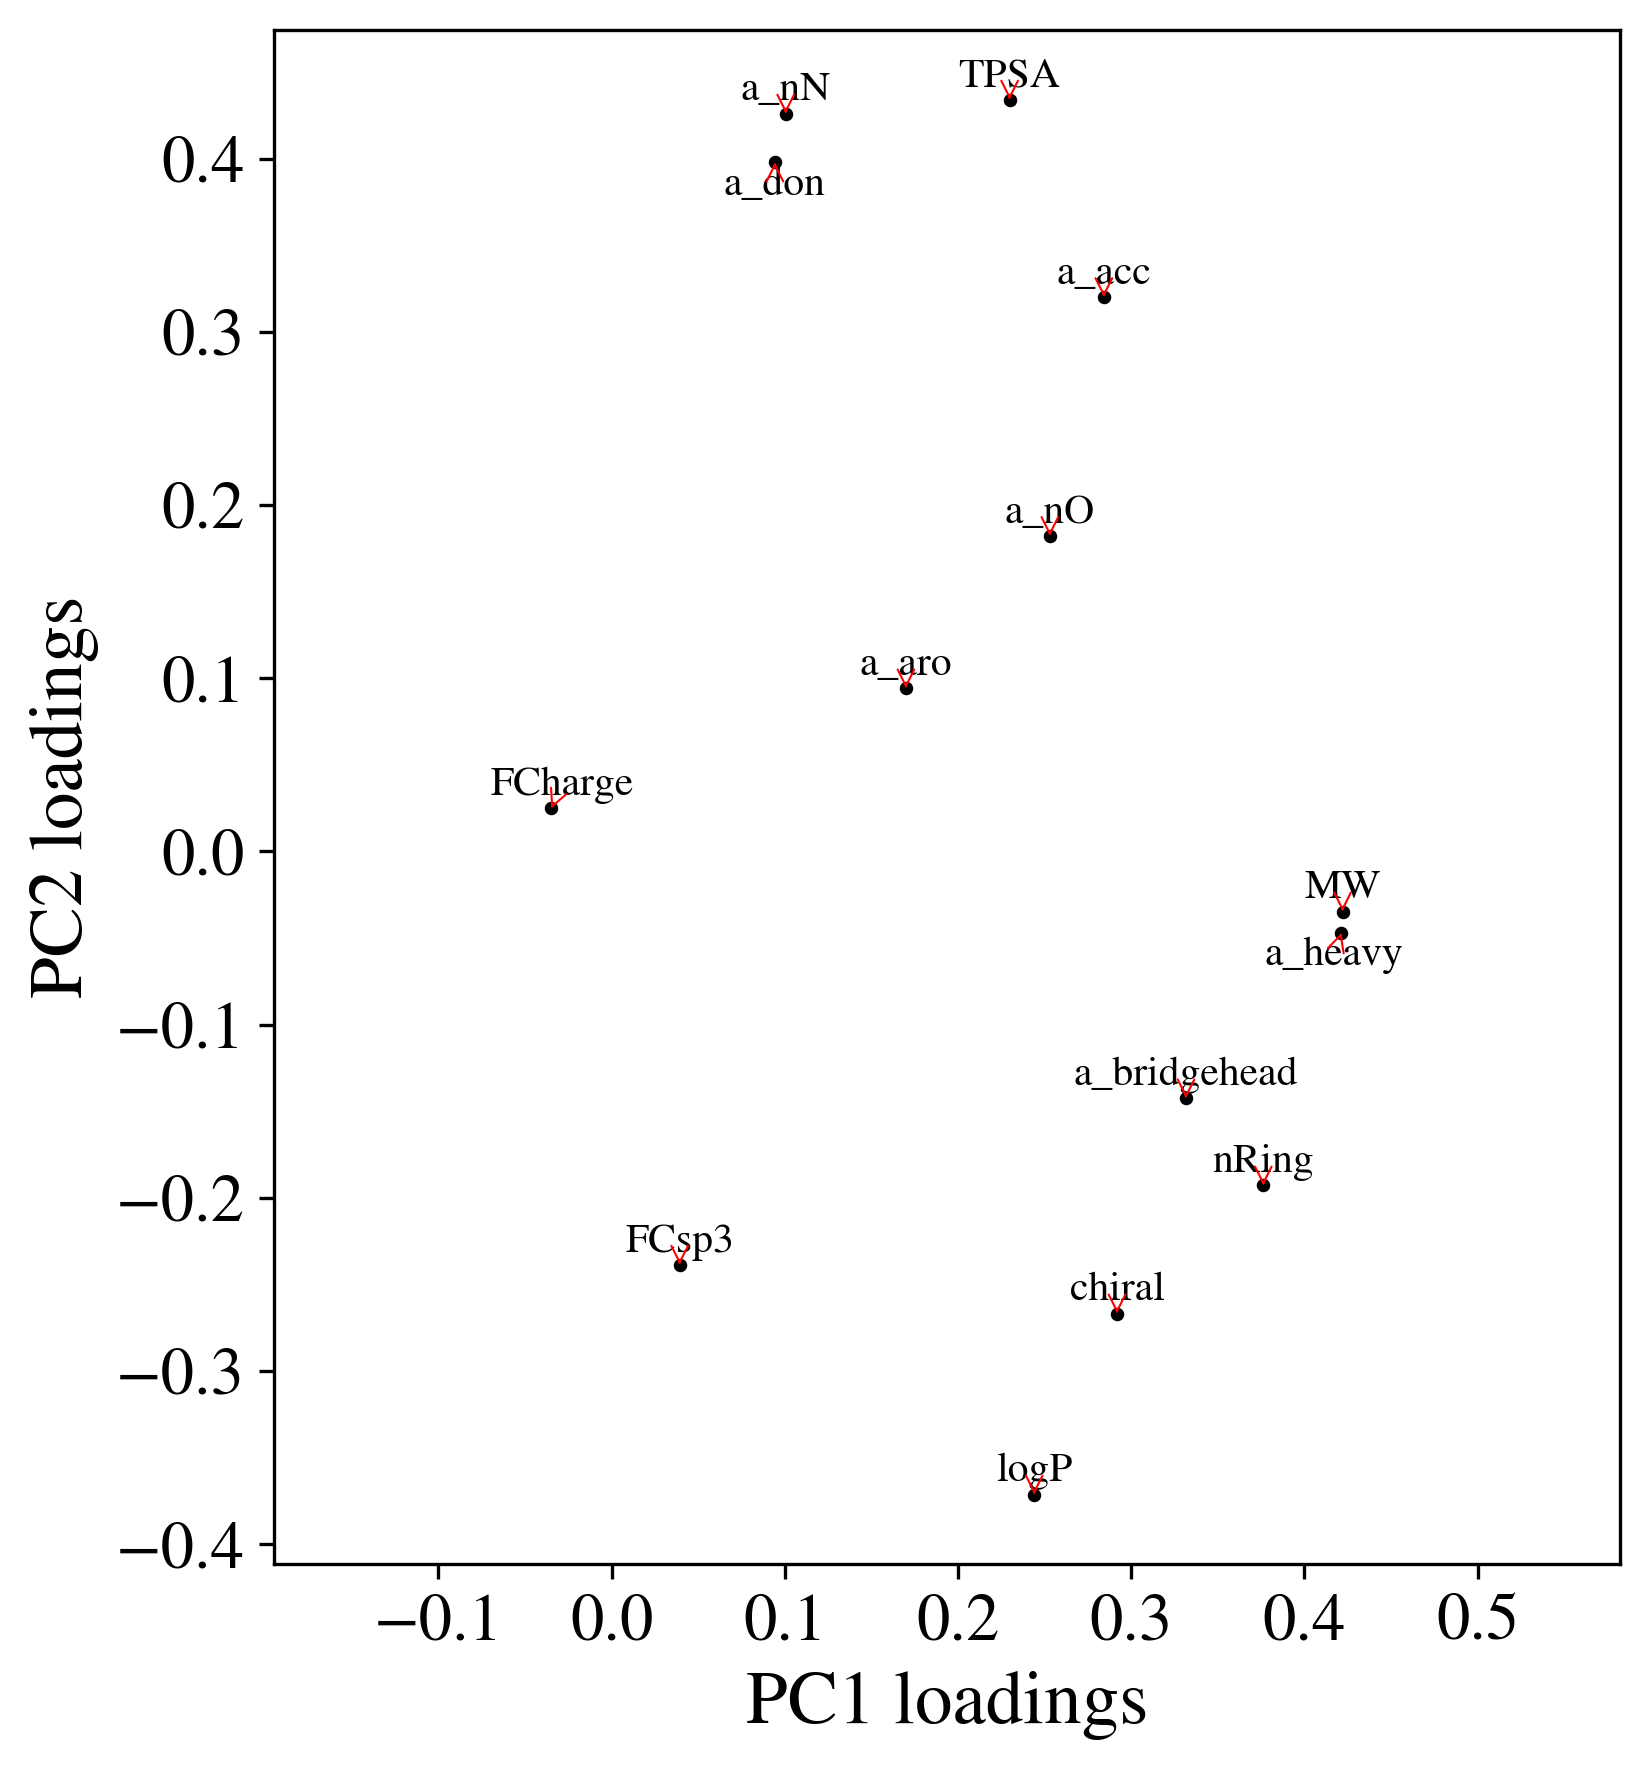

In [58]:
plot_loading(loadings)